In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

 99% 1.67G/1.68G [00:11<00:00, 244MB/s]
100% 1.68G/1.68G [00:11<00:00, 160MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/deepfake-and-real-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [9]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
Validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 140002 files belonging to 2 classes.
Found 10905 files belonging to 2 classes.


In [10]:
# normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
Validation_ds = Validation_ds.map(process)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [15]:
history = model.fit(train_ds, epochs = 10, validation_data = Validation_ds, callbacks = early_stopping)

Epoch 1/10
4376/4376 [==============================] - 330s 72ms/step - loss: 0.2735 - accuracy: 0.8791 - val_loss: 0.3342 - val_accuracy: 0.8579
Epoch 2/10
4376/4376 [==============================] - 314s 72ms/step - loss: 0.1417 - accuracy: 0.9423 - val_loss: 0.2935 - val_accuracy: 0.8771
Epoch 3/10
4376/4376 [==============================] - 304s 69ms/step - loss: 0.0916 - accuracy: 0.9640 - val_loss: 0.3497 - val_accuracy: 0.8743
Epoch 4/10
4376/4376 [==============================] - 306s 70ms/step - loss: 0.0617 - accuracy: 0.9756 - val_loss: 0.4164 - val_accuracy: 0.8702
Epoch 5/10
4376/4376 [==============================] - 307s 70ms/step - loss: 0.0440 - accuracy: 0.9830 - val_loss: 0.4626 - val_accuracy: 0.8659
Epoch 6/10
4376/4376 [==============================] - 314s 72ms/step - loss: 0.0347 - accuracy: 0.9870 - val_loss: 0.6100 - val_accuracy: 0.8599
Epoch 7/10
4376/4376 [==============================] - 305s 70ms/step - loss: 0.0292 - accuracy: 0.9894 - val_loss: 0

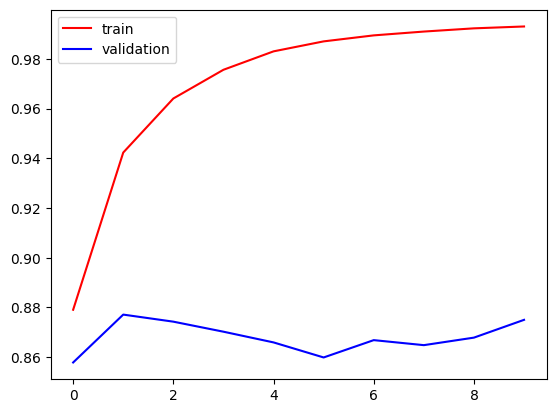

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

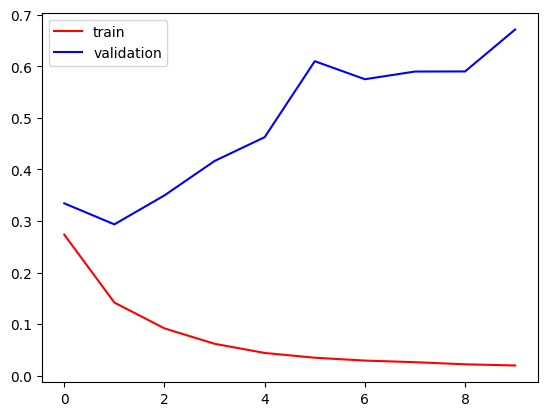

In [17]:
plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [85]:
test_img = cv2.imread('/content/Fake.jpg')

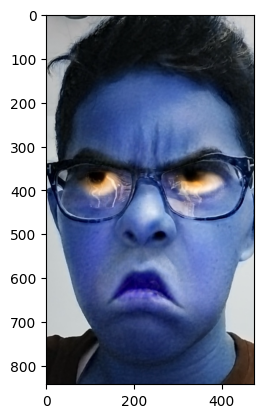

In [86]:
plt.imshow(test_img)

In [87]:
test_img.shape

(842, 473, 3)

In [89]:
test_img = cv2.resize(test_img,(256,256))

In [90]:
test_input = test_img.reshape((1,256,256,3))

In [91]:
model.predict(test_input)

1/1 [==============================] - 0s 41ms/step


array([[0.]], dtype=float32)

In [92]:
test_img1 = cv2.imread('/content/Real.jpg')

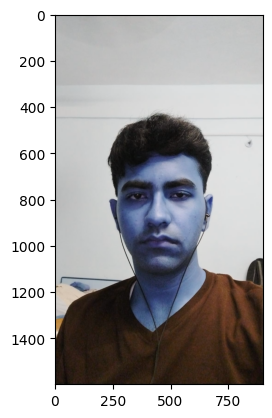

In [93]:
plt.imshow(test_img1)

In [94]:
test_img1.shape

(1599, 899, 3)

In [95]:
test_img1 = cv2.resize(test_img1,(256,256))

In [97]:
test_input1 = test_img1.reshape((1,256,256,3))

In [98]:
model.predict(test_input1)

1/1 [==============================] - 0s 59ms/step


array([[1.]], dtype=float32)

In [99]:
test_img2 = cv2.imread('/content/Fake1.jpg')

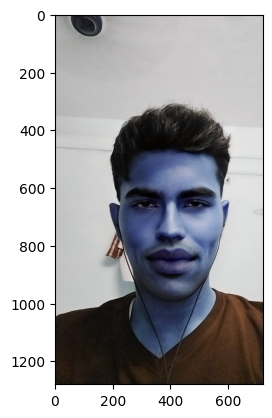

In [100]:
plt.imshow(test_img2)

In [101]:
test_img2.shape

(1280, 720, 3)

In [102]:
test_img2 = cv2.resize(test_img2,(256,256))

In [103]:
test_input2 = test_img2.reshape((1,256,256,3))

In [104]:
model.predict(test_input2)

1/1 [==============================] - 0s 35ms/step


array([[1.]], dtype=float32)